In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def normalize_image(img):
    mean = img.reshape(-1, 3).mean(0).reshape(1, 1, -1)
    std = img.reshape(-1, 3).std(0).reshape(1, 1, -1)

    img = (img - mean) / std
    img = (np.clip(img, [-4, -4, -4], [4, 4, 4]) + 4) / 8
    img = (img*255).astype(np.uint8)
    return img

In [3]:
img1 = cv2.imread("data/face.jpg")
img2 = cv2.imread("data/face_dark.jpg")
img3 = cv2.imread("data/face_mask_dark.jpg")
img4 = cv2.imread("data/face_mask_white.jpg")

In [4]:
img1 = normalize_image(img1)
img2 = normalize_image(img2)
img3 = normalize_image(img3)
img4 = normalize_image(img4)

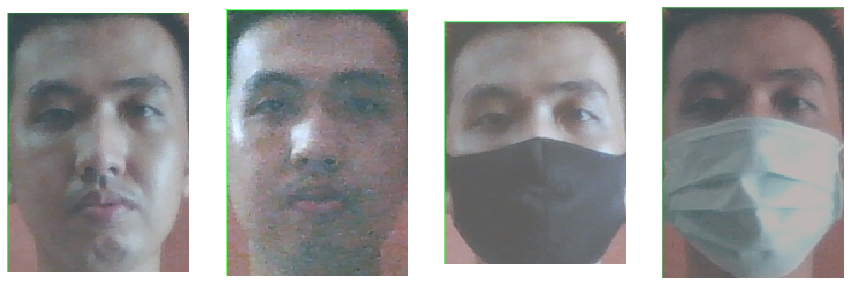

In [5]:
plt.figure(figsize=(15, 5))

plt.subplot(141)
plt.imshow(img1[..., ::-1])
plt.axis("off");

plt.subplot(142)
plt.imshow(img2[..., ::-1])
plt.axis("off");

plt.subplot(143)
plt.imshow(img3[..., ::-1])
plt.axis("off");

plt.subplot(144)
plt.imshow(img4[..., ::-1])
plt.axis("off");

# Analisis ulang Color Histogram

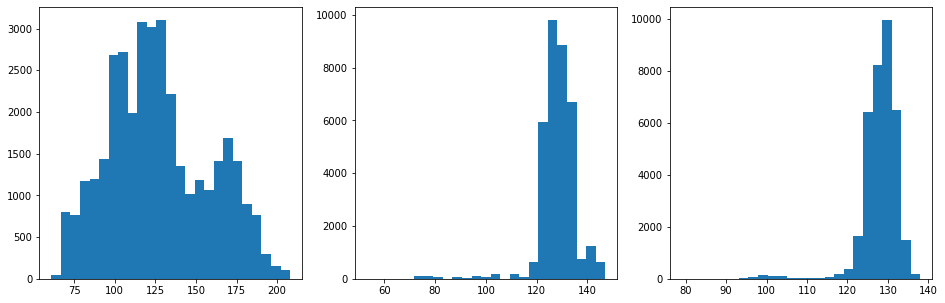

In [6]:
ycrcb = cv2.cvtColor(img1, cv2.COLOR_BGR2YCrCb)
y, cr, cb = cv2.split(ycrcb)

fig, ax = plt.subplots(1, 3, figsize=(16, 5))
ax[0].hist(y.flatten(), bins=25)
ax[1].hist(cr.flatten(), bins=25)
ax[2].hist(cb.flatten(), bins=25);

In [63]:
def calculate_skin_percent(face, min_val=(110, 125, 125), max_val=(180, 140, 135)):
    face = normalize_image(face)
    ycrcb = cv2.cvtColor(face, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(ycrcb)
    
    min_val = np.array(min_val, dtype=np.uint8)
    max_val = np.array(max_val, dtype=np.uint8)

    skin = ((ycrcb >= min_val) & (ycrcb <= max_val)).all(2)
    skin_percent = skin.mean()
    return skin_percent

In [ ]:
def plot_skin(face, min_val=(115, 125, 125), max_val=(150, 140, 135)):
    face = normalize_image(face)
    ycrcb = cv2.cvtColor(face, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(ycrcb)
    
    min_val = np.array(min_val, dtype=np.uint8)
    max_val = np.array(max_val, dtype=np.uint8)

    skin = ((ycrcb >= min_val) & (ycrcb <= max_val)).all(2)
    plt.imshow(skin, cmap="gray")
    plt.axis("off")
    plt.title(f"{skin.mean()*100:.1f}%")

In [ ]:
plot_skin(img4)

# Sanity Check

In [64]:
image = cv2.imread("data/face_mask_dark.jpg")
calculate_skin_percent(image)

0.33739708218980213

In [65]:
image = cv2.imread("data/face_mask_white.jpg")
calculate_skin_percent(image)

0.16719633719364396

In [66]:
image = cv2.imread("data/face.jpg")
calculate_skin_percent(image)

0.4579746835443038

In [67]:
image = cv2.imread("data/face_dark.jpg")
calculate_skin_percent(image)

0.4649246351622666